#Prediksi Harga Rumah
prediksi harga rumah akan menggunakan 'RandomForestRegressor'untuk melatih data, kemudian melakukan prediksi setelah data di split menjadi data train dan data validation.

#Langkah Pengerjaan:
- Preprocessing Data : melakukan penyipan data agar dapat dilakukan explorasi data.
- Explorasi Data : tahap ini dilakukan untuk mengetahui fitur-fitur apa saja yang baik untuk digunakan saat melakukan proses modeling data agar hasil prediksi yang didapatkan dapat mencapai hasil yang maksimal
- Modeling : Untuk modeling saya menggunakan random forest dengan harapan prediksi yang didapatkan lebih akurat dan stabil.



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [108]:
total_data = len(df)
print(f"Total data (jumlah baris): {total_data}")

Total data (jumlah baris): 1460


In [109]:
# Mendrop kolom dengan tipe data 'object'
df_dropped = df.select_dtypes(exclude=['object'])

# Menampilkan DataFrame setelah mendrop kolom dengan tipe data 'object'
print("\nDataFrame setelah mendrop kolom dengan tipe data 'object':")
print(df_dropped)


DataFrame setelah mendrop kolom dengan tipe data 'object':
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinS

In [110]:
# Memeriksa jumlah nilai NaN dalam setiap kolom
print("\nJumlah nilai NaN dalam setiap kolom:")
print(df_dropped.isna().sum())

# Menghapus baris yang berisi nilai NaN
data_cleaned = df_dropped.dropna()



Jumlah nilai NaN dalam setiap kolom:
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [111]:
# Menampilkan beberapa baris pertama dari dataset setelah perubahan
print("\nSetelah menghapus nilai NaN:")
print(data_cleaned.head())


Setelah menghapus nilai NaN:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea

In [112]:
# Memeriksa jumlah nilai NaN dalam setiap kolom
print("\nJumlah nilai NaN dalam setiap kolom:")
print(data_cleaned.isna().sum())


Jumlah nilai NaN dalam setiap kolom:
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


#Explorasi Data Train

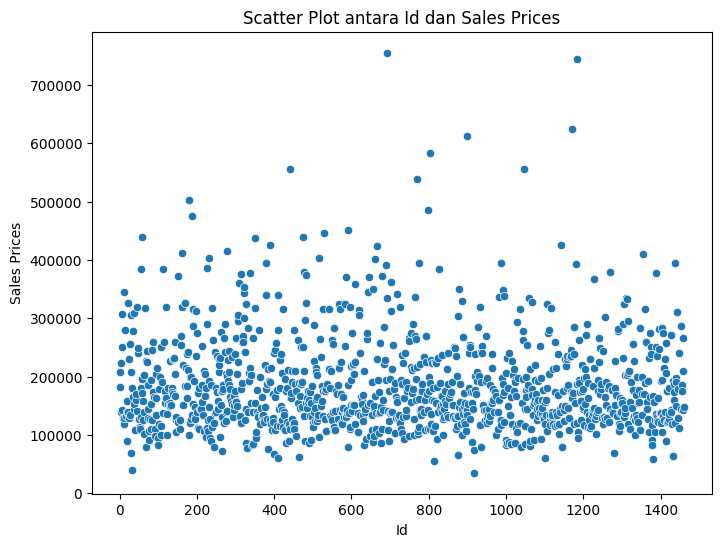

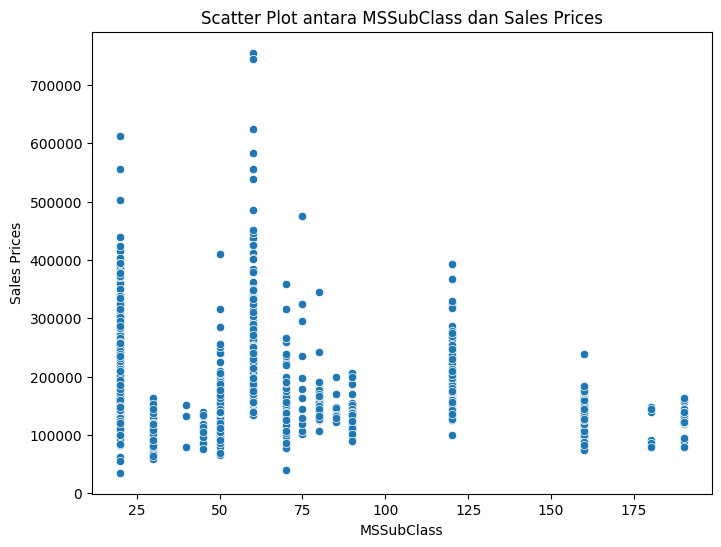

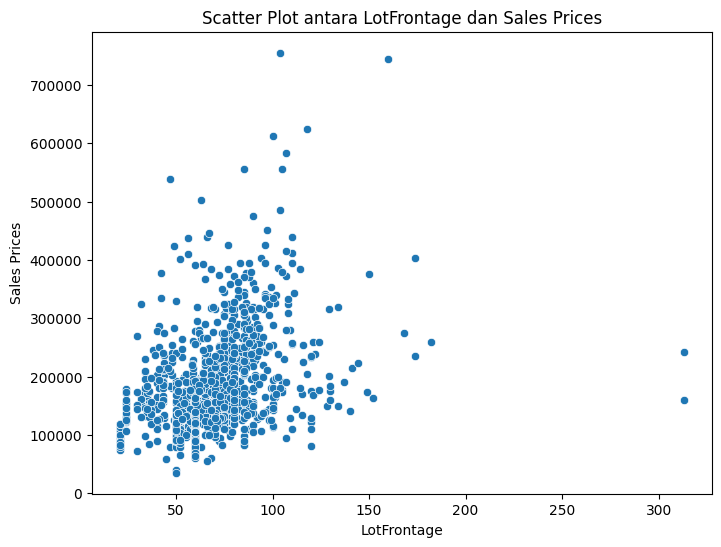

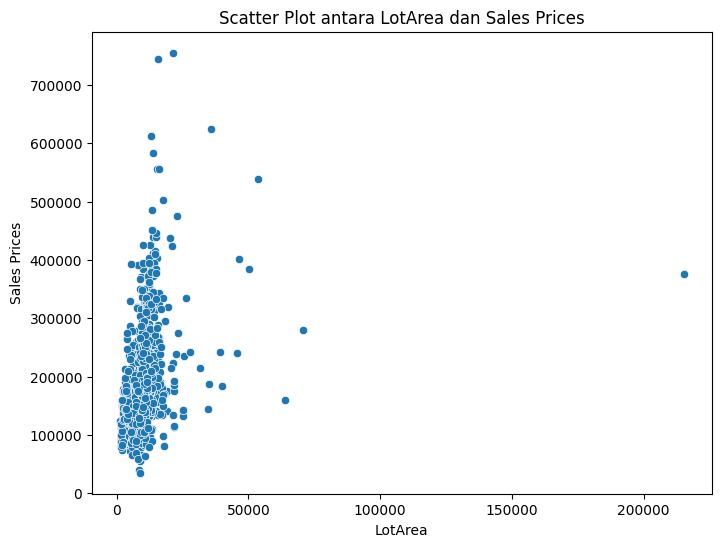

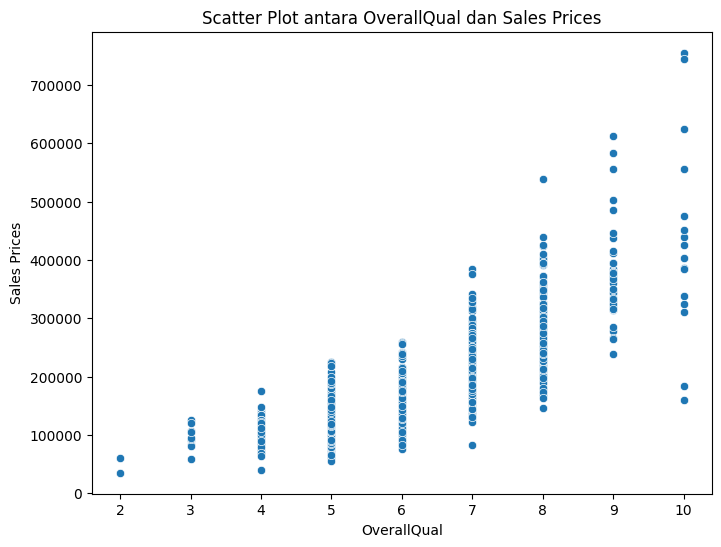

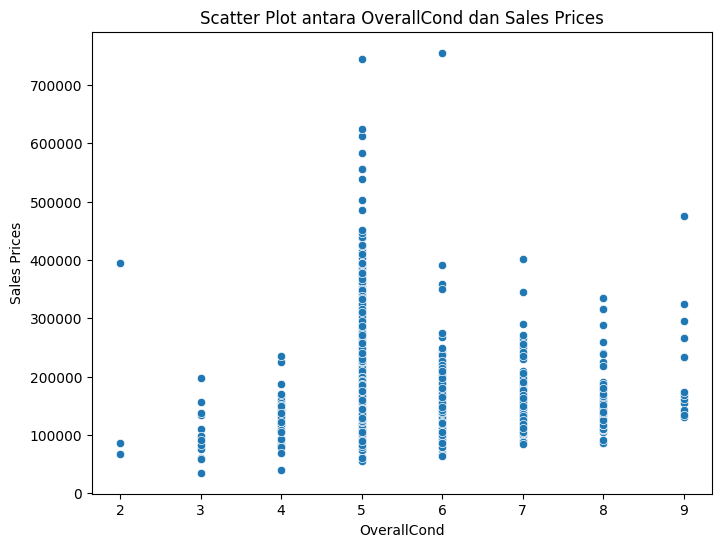

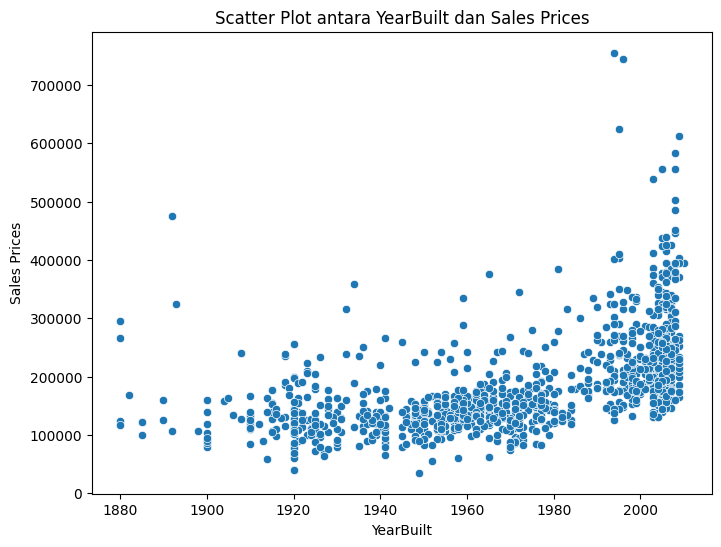

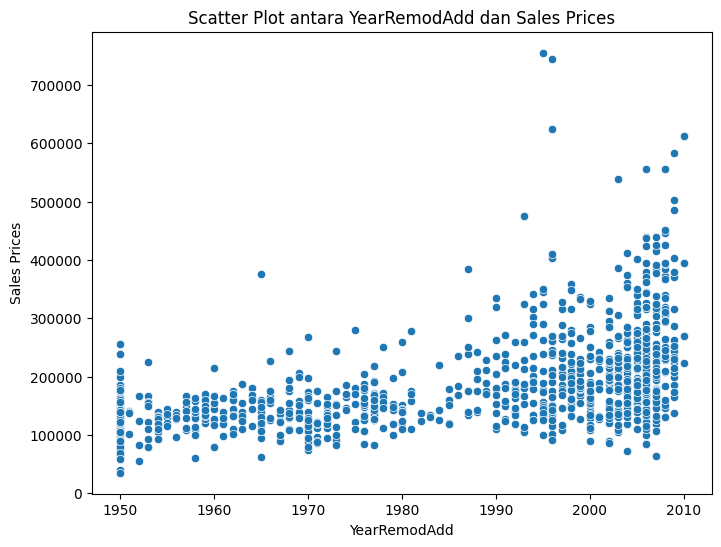

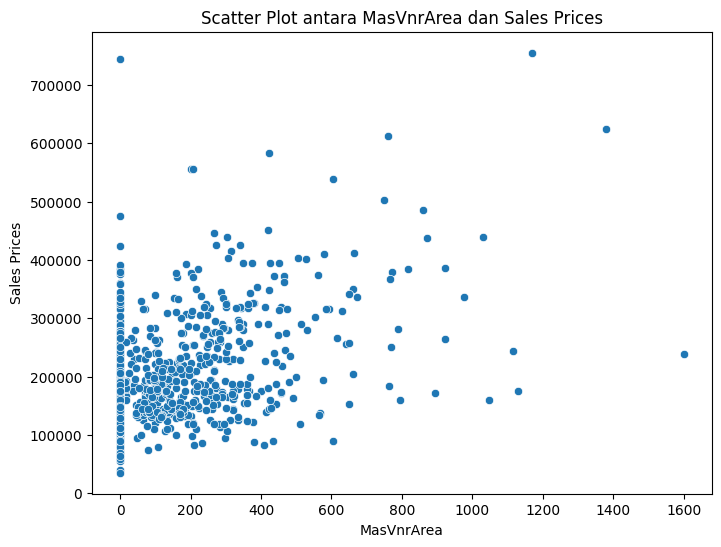

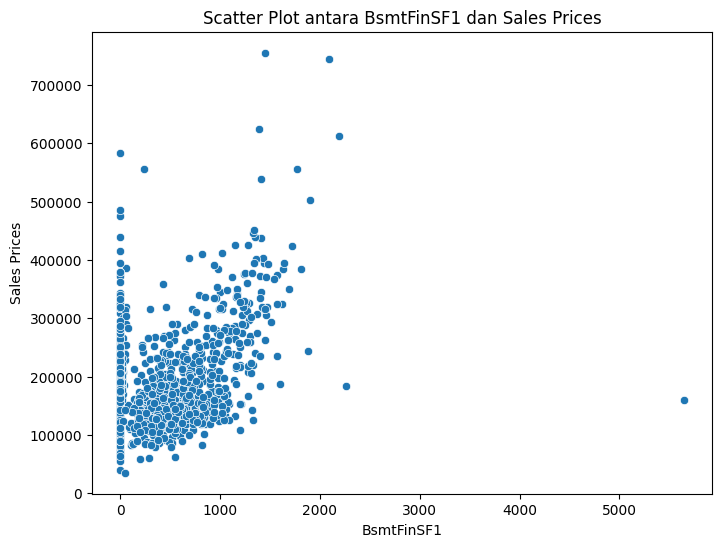

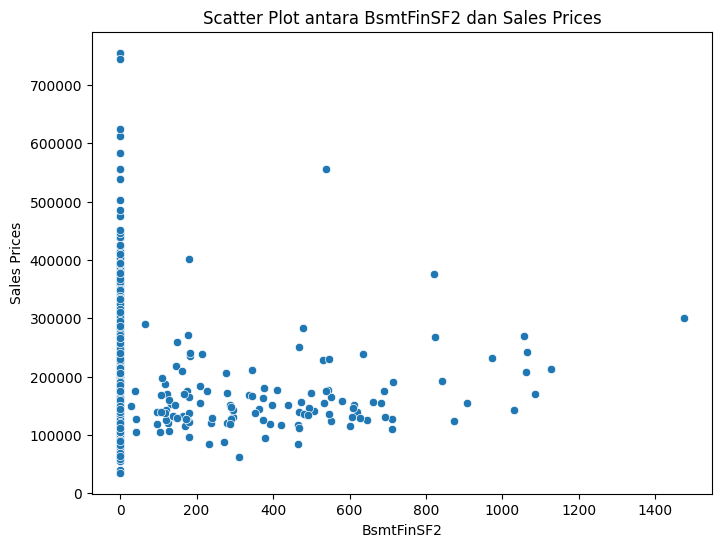

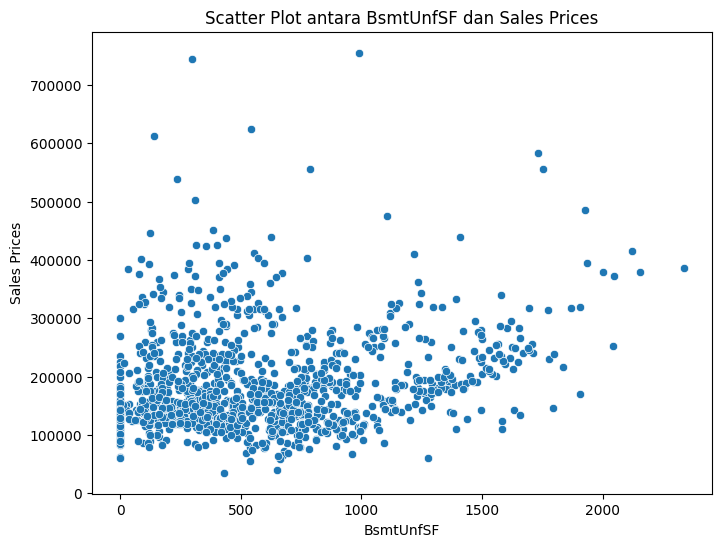

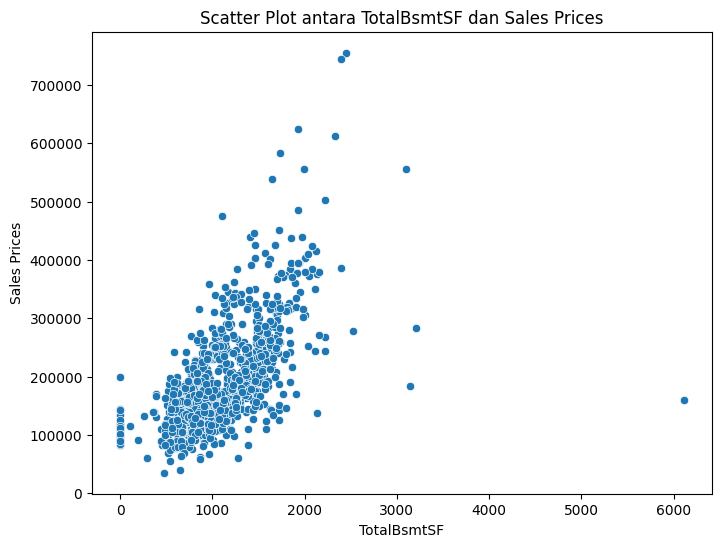

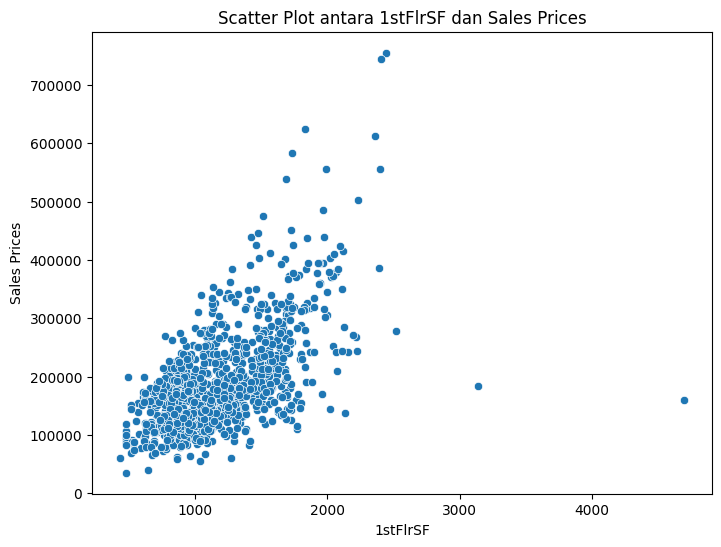

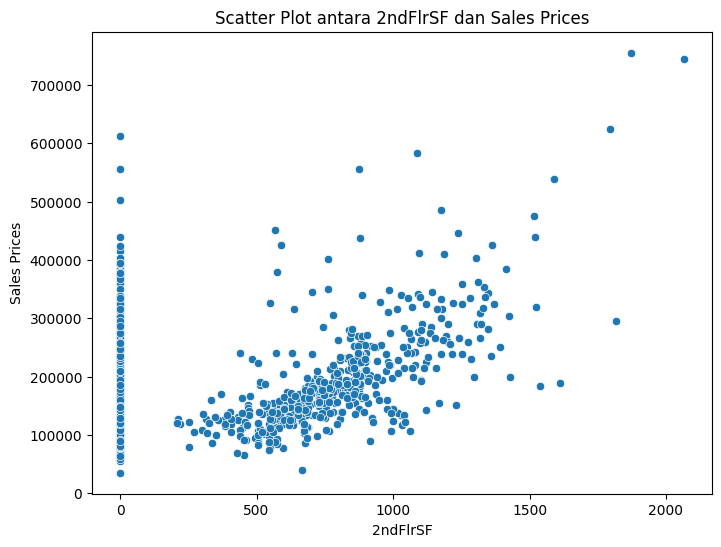

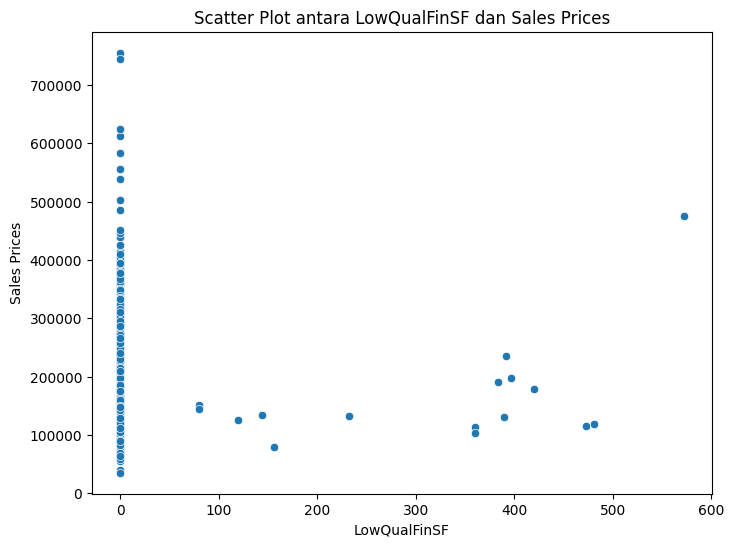

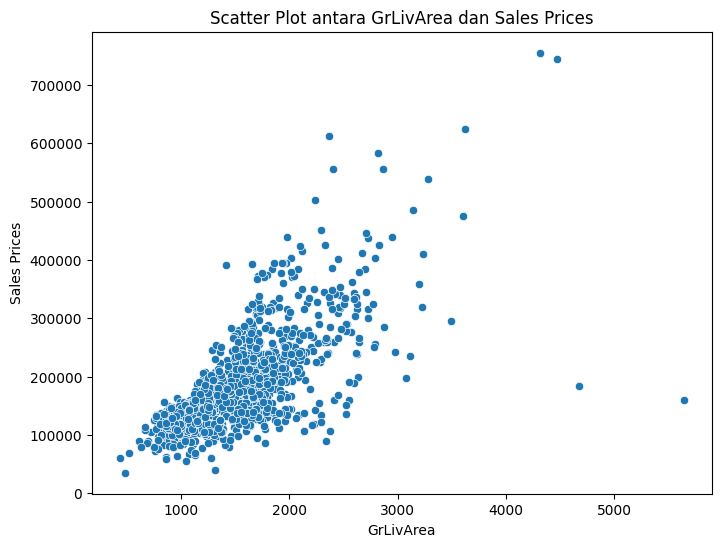

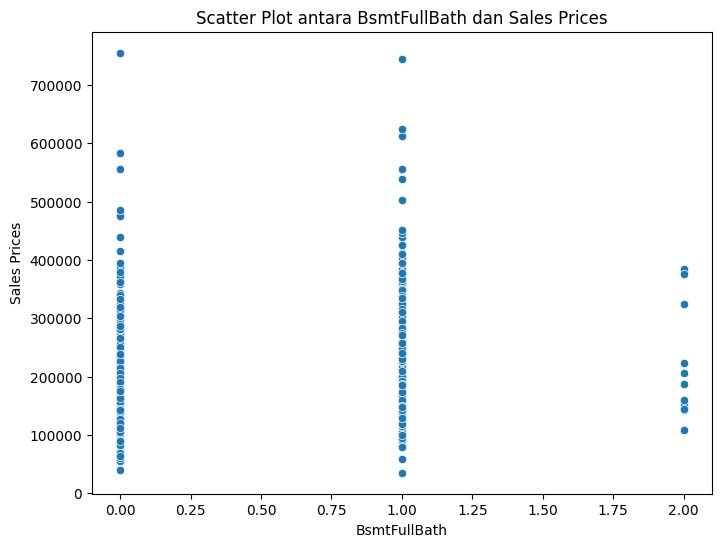

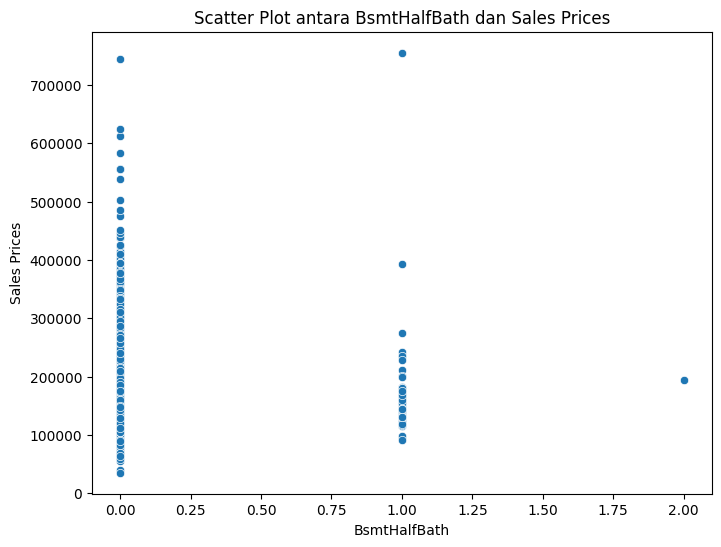

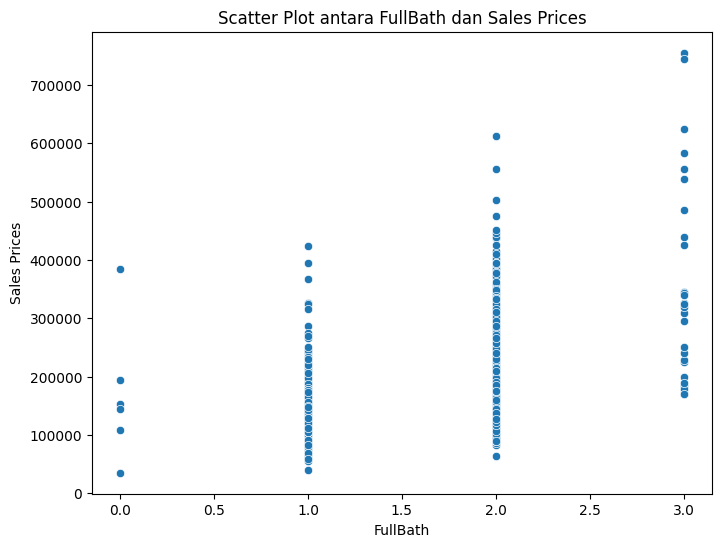

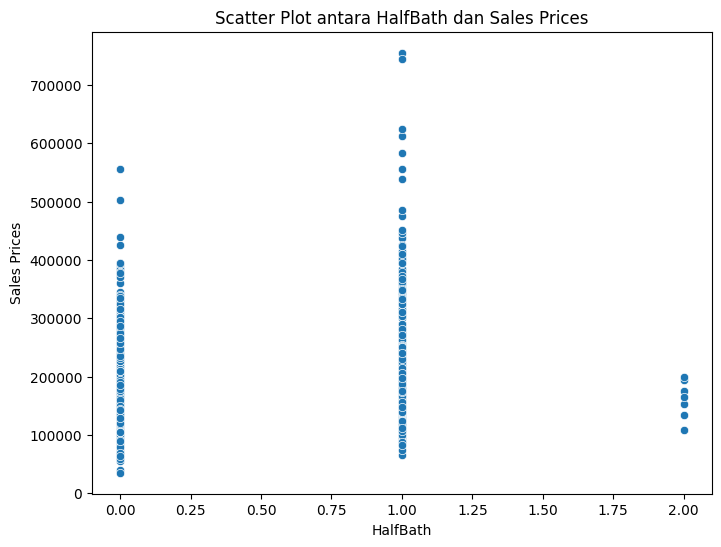

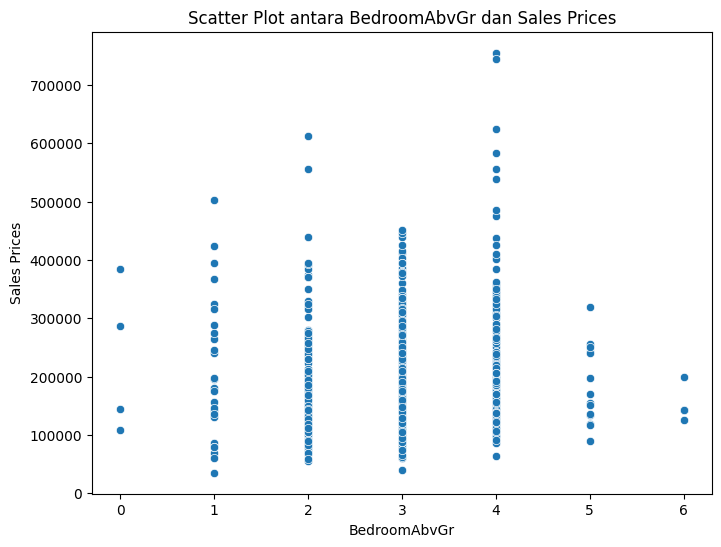

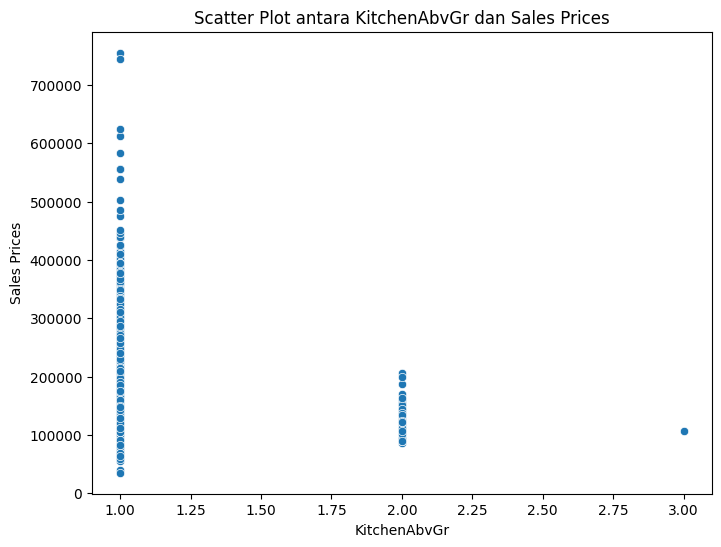

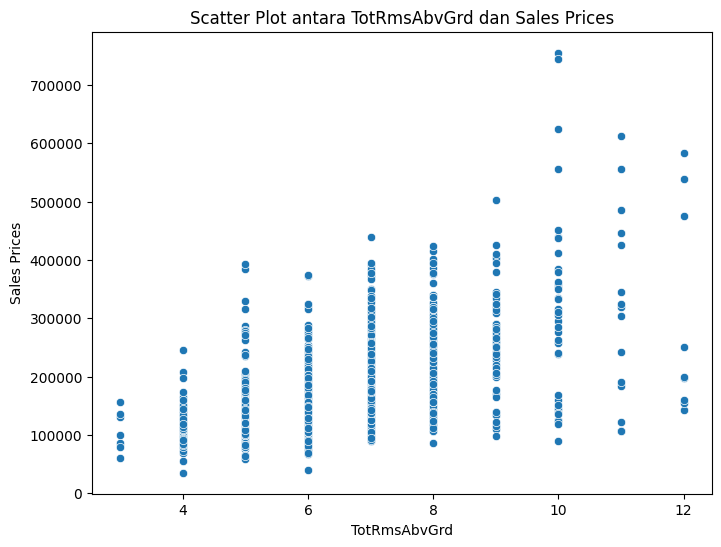

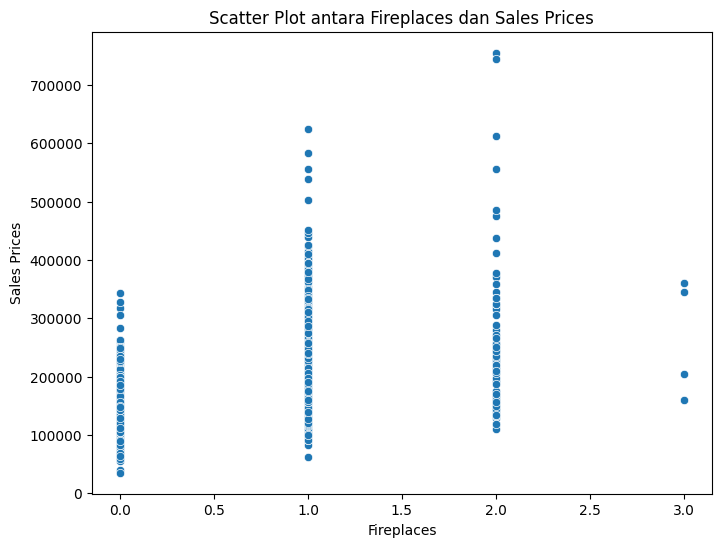

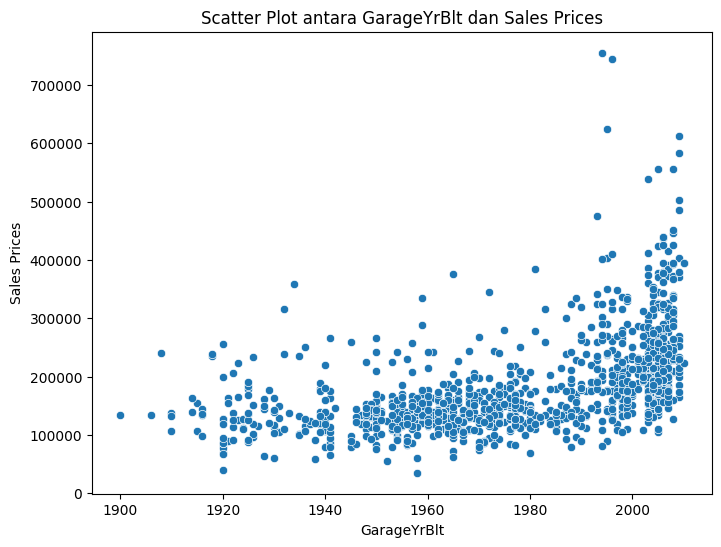

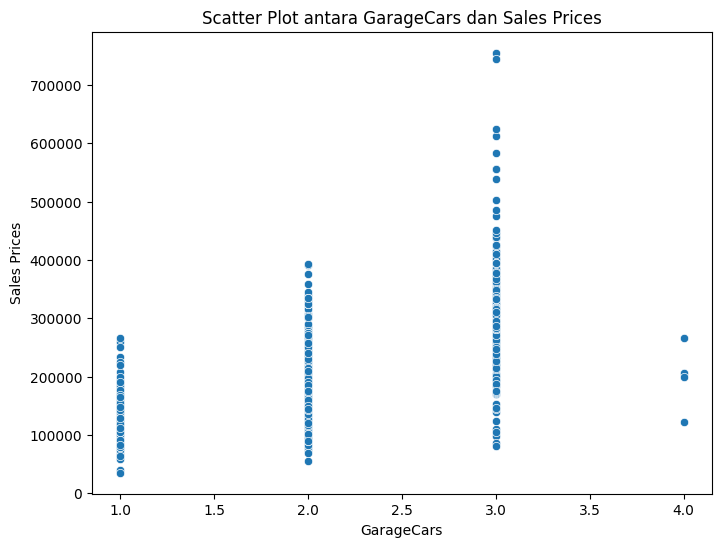

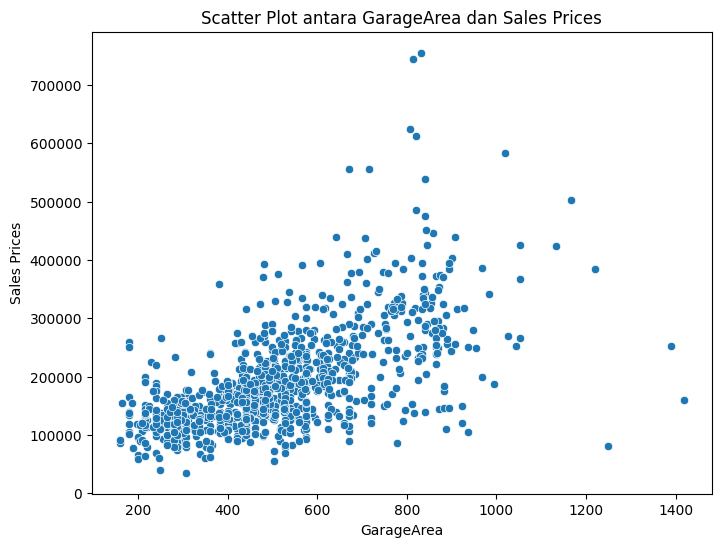

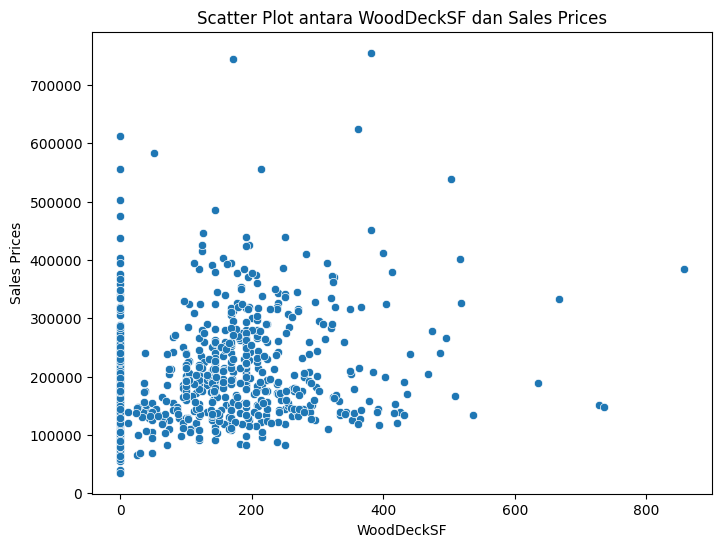

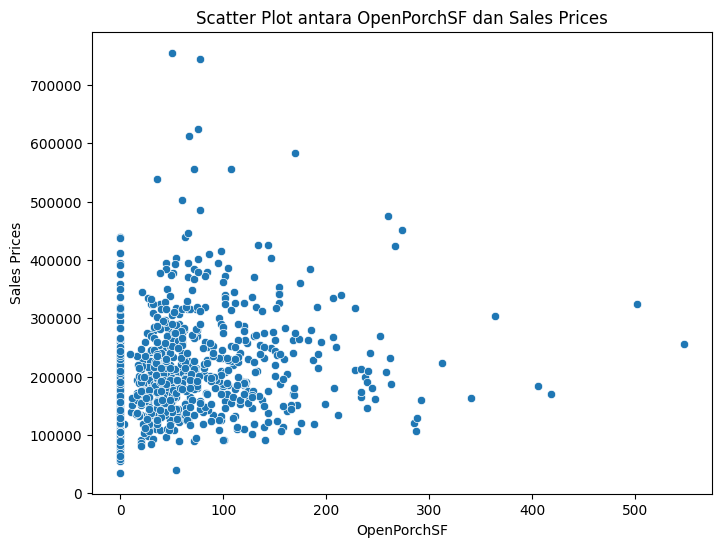

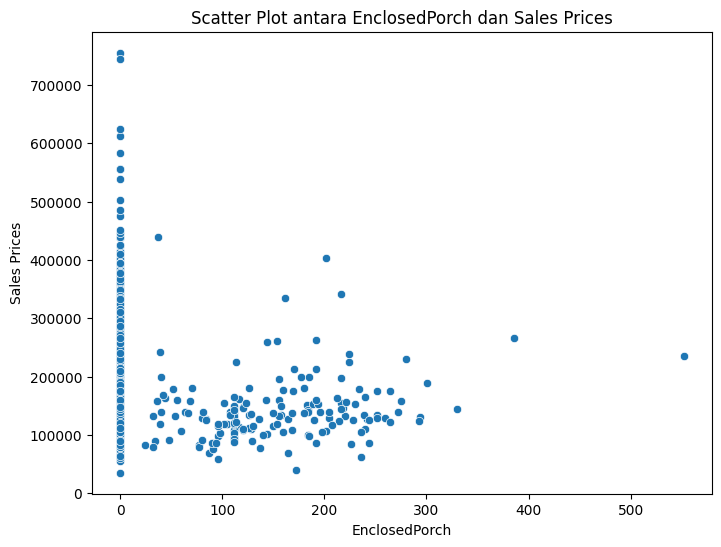

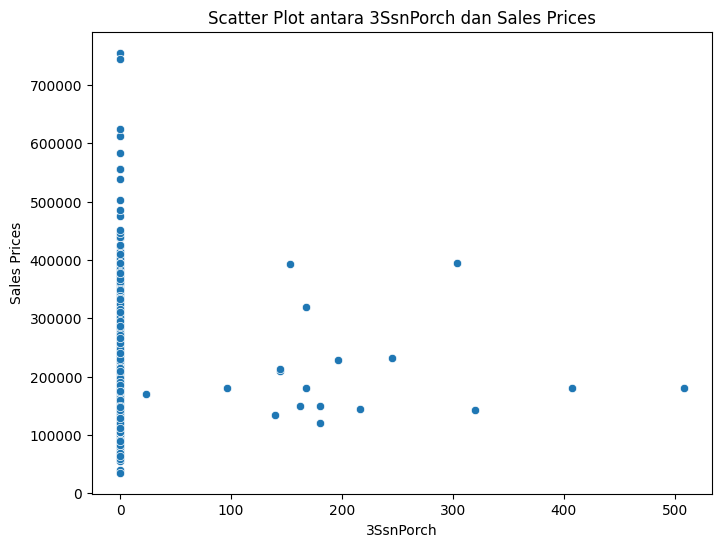

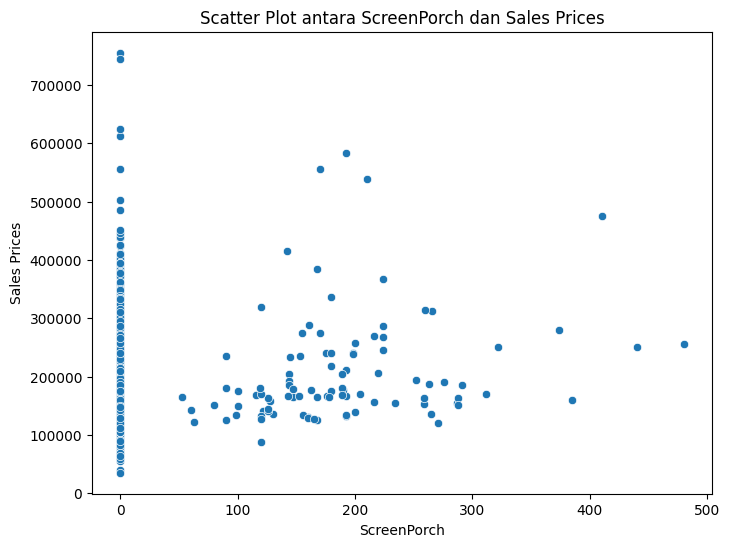

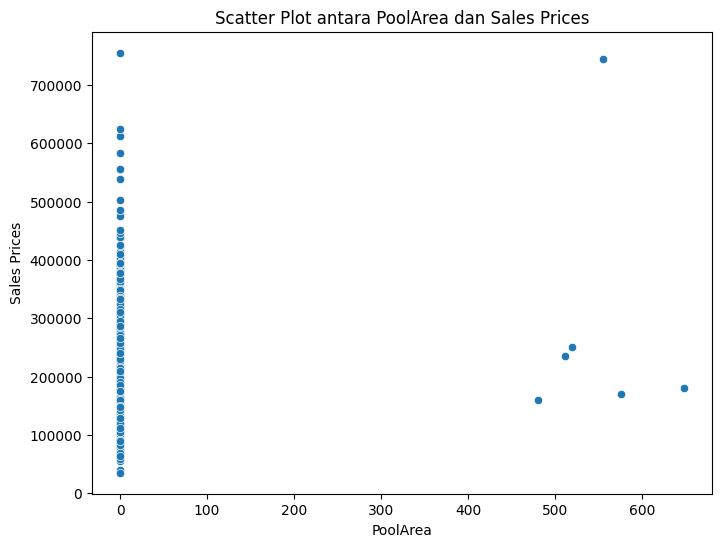

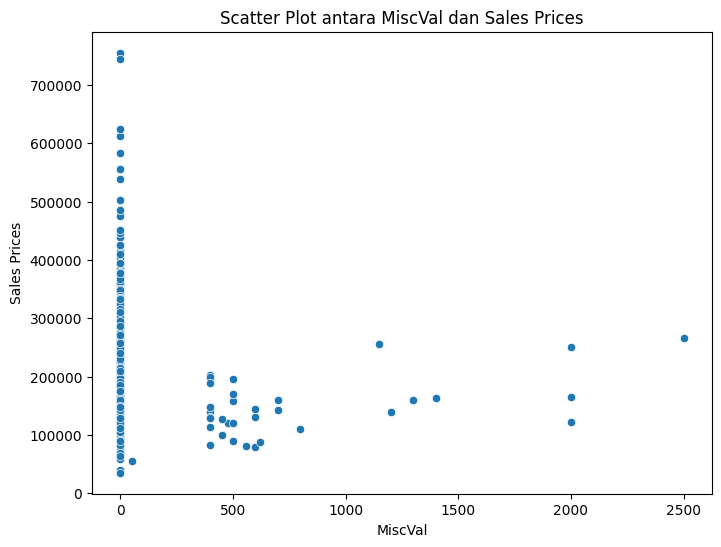

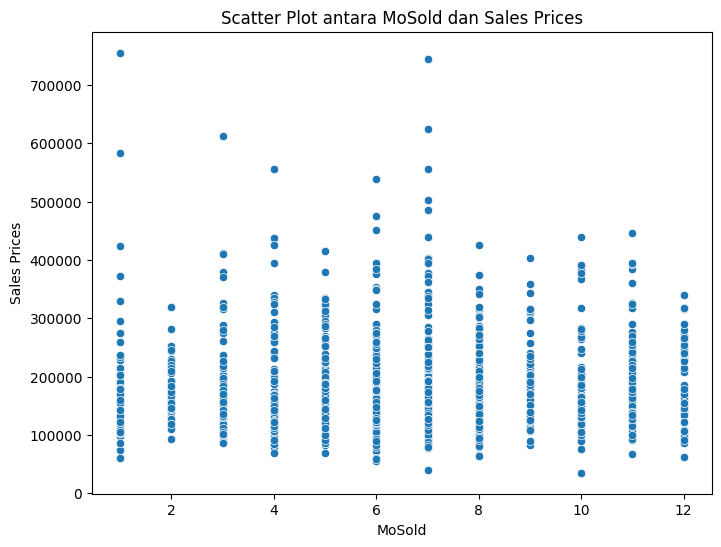

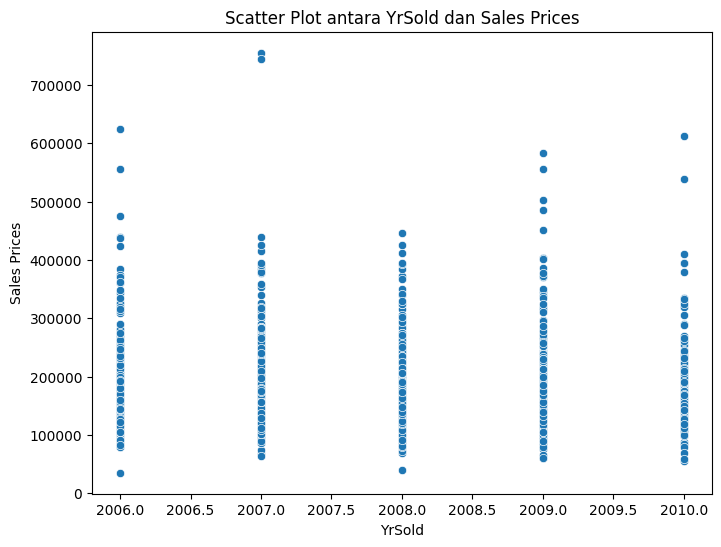

In [113]:
#menampilkan hubungan antara setiap column yang digunakan dengan sales prices dengan scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot antara fitur dan sales prices
for column in data_cleaned.columns[:-1]:  # Menghindari kolom sales_prices itu sendiri
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_cleaned[column], y=data_cleaned['SalePrice'])
    plt.title(f'Scatter Plot antara {column} dan Sales Prices')
    plt.xlabel(column)
    plt.ylabel('Sales Prices')
    plt.show()


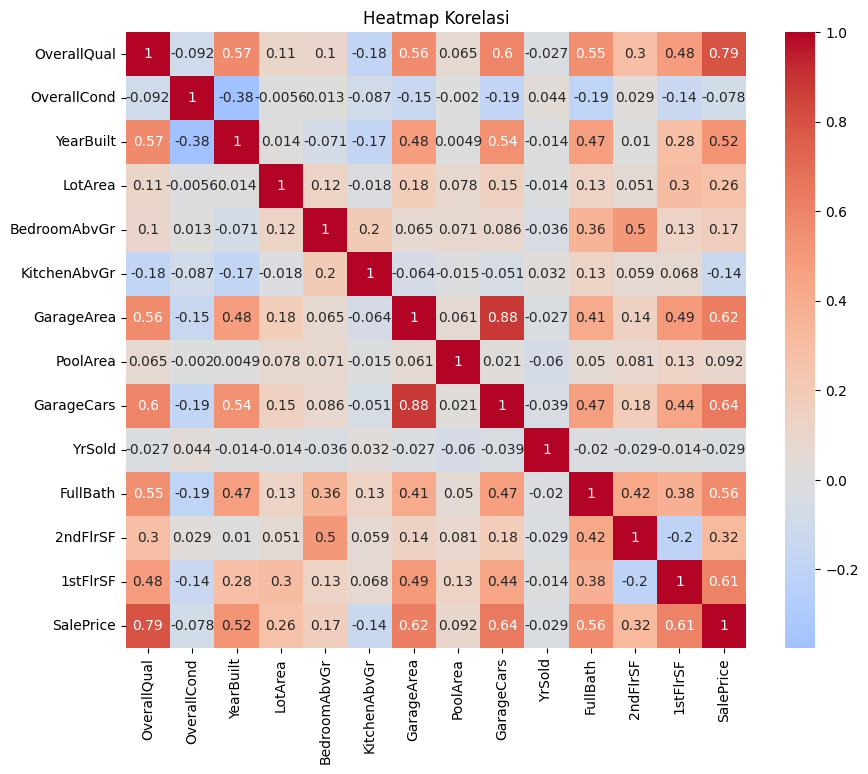

In [114]:
# Memilih kolom yang ingin dianalisis
columns_of_interest = ['OverallQual', 'OverallCond', 'YearBuilt','LotArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'PoolArea', 'GarageCars', 'YrSold', 'FullBath', '2ndFlrSF', '1stFlrSF','SalePrice']
data_cleaned = df[columns_of_interest]

# Menghitung matriks korelasi
correlation_matrix = data_cleaned.corr()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

#Modeling

In [115]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Create target object and call it y
y = data_cleaned.SalePrice
# Create X
features = ['GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'YearBuilt', 'OverallQual']
X =data_cleaned[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Langkah 2: Melatih model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [117]:
# Make validation predictions and calculate mean absolute error
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
model = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))



Validation MAE when not specifying max_leaf_nodes: 22,215
Validation MAE for best value of max_leaf_nodes: 22,149


In [118]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Prediksi harga rumah pada data fitur 'X'
predicted_home_prices = model.predict(X)

# Hitung Mean Absolute Error antara nilai sebenarnya 'y' dan nilai prediksi
mae = mean_absolute_error(y, predicted_home_prices)

# Gabungkan nilai sebenarnya dan prediksi ke dalam DataFrame untuk tampilan
results = pd.DataFrame({'Actual': y, 'Predicted': predicted_home_prices})

# Jika Anda ingin memformat kolom 'Predicted' tanpa desimal, Anda bisa menggunakan .apply
results['Actual'] = results['Actual'].apply(lambda x: "{:,.0f}".format(x))

# Jika Anda ingin memformat kolom 'Predicted' tanpa desimal, Anda bisa menggunakan .apply
results['Predicted'] = results['Predicted'].apply(lambda x: "{:,.0f}".format(x))

# Tampilkan beberapa baris hasil prediksi untuk dilihat
print(results.head(10))

# Tampilkan Mean Absolute Error
print("Mean Absolute Error: {:,.0f}".format(mae))


    Actual Predicted
0  208,500   203,404
1  181,500   163,763
2  223,500   224,067
3  140,000   192,216
4  250,000   271,455
5  143,000   132,474
6  307,000   284,982
7  200,000   190,321
8  129,900   168,296
9  118,000   118,133
Mean Absolute Error: 16,719
